In [1]:
import csv, os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import Helpers

In [2]:
covidFile = open("owid-covid-data.csv")
covidReader = csv.reader(covidFile)
myList = list(covidReader)
myList = Helpers.removeEmptyLists(myList)  # Remove empty rows from csv file
#print(myList[0][1])  # continent column
#print(myList[0][3])  # date column
#print(myList[0][4])  # total cases column

continent
date
total_cases


In [32]:
def total_cases_calculator(dict_cont, loc, month, cont, cases):  # TODO: Put this in a seperate src file
    
    if loc[0] == loc[1] and month[0] != month[1]: 
        if month[0] == '12':
            dict_cont[month[0]][0] += int(cases[0])  # Always adds December values to year 2020

        else:
            dict_cont[month[0]][year_index] += int(cases[0])  # Otherwise adds to correct year 

    if cont[0] != cont[1]:
        if month[0] == '12':
                dict_cont[month[0]][0] += int(cases[0])

        else:
            dict_cont[month[0]][year_index] += int(cases[0])

In [33]:
years = ['2020', '2021']

months_list = ['Jan2020', 'Feb2020', 'Mar2020', 'Apr2020', 'May2020', 'Jun2020',
               'Jul2020', 'Aug2020', 'Sep2020', 'Oct2020', 'Nov2020', 'Dec2020',
               'Jan2021', 'Feb2021', 'Mar2021', 'Apr2021', 'May2021', 'Jun2021',
               'Jul2021', 'Aug2021', 'Sep2021', 'Oct2021', 'Nov2021', 'Dec2021']  

months_labels = ['Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '',
                 'Jan', '', 'Mar', '', 'May', '',
                 'Jul', '', 'Sep', '', 'Nov', '']  # xtick labels for matplotlib

casesByMonth_Asia   = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_Africa = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_NA     = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_SA     = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}

casesByMonth_Europe = {'01' : [0, 0], '02' : [0, 0], '03' : [0, 0], '04' : [0, 0], '05' : [0, 0], '06' : [0, 0], 
                       '07' : [0, 0], '08' : [0, 0], '09' : [0, 0], '10' : [0, 0], '11' : [0, 0], '12' : [0, 0]}


temp_loc, temp_cases, temp_month, temp_cont, temp_year = ['', ''], ['', ''], ['', ''], ['',''], ['','']

#Printing the entirety of a list can use a lot of memory, instead you can use a for loop.
for i, row in enumerate(myList):
    
    for year in years:
    
        if myList[i][3][5:7] in casesByMonth_Asia.keys():

            if not myList[i][4].isdecimal(): continue  # Incorrectly formatted rows will cause errors (rare)

            # Sum the total cases in a specified continent at the end of a month.
            # Temporary lists check when the month or location has changed.
            temp_loc[0]   = temp_loc[1]
            temp_loc[1]   = myList[i][2]

            temp_cases[0] = temp_cases[1]
            temp_cases[1] = myList[i][4]

            temp_month[0] = temp_month[1]
            temp_month[1] = myList[i][3][5:7]

            temp_cont[0] = temp_cont[1]
            temp_cont[1] = myList[i][2]

            temp_year[0] = temp_year[1]
            temp_year[1] = myList[i][3][:4]
            
            if i==1: continue  # Skip the first row, since temp_lists still have a blank element.

            if temp_year[0] == '2020': year_index = 0
            else: year_index = 1

            if myList[i][1] == "Asia": total_cases_calculator(casesByMonth_Asia, temp_loc, temp_month, temp_cont, temp_cases)
            elif myList[i][1] == "Africa": total_cases_calculator(casesByMonth_Africa, temp_loc, temp_month, temp_cont, temp_cases)
            elif myList[i][1] == "North America": total_cases_calculator(casesByMonth_NA, temp_loc, temp_month, temp_cont, temp_cases)
            elif myList[i][1] == "South America": total_cases_calculator(casesByMonth_SA, temp_loc, temp_month, temp_cont, temp_cases)
            elif myList[i][1] == "Europe": total_cases_calculator(casesByMonth_Europe, temp_loc, temp_month, temp_cont, temp_cases)        

casesByMonth_Asia   = list(casesByMonth_Asia.values())
casesByMonth_Africa = list(casesByMonth_Africa.values())
casesByMonth_NA     = list(casesByMonth_NA.values())
casesByMonth_SA     = list(casesByMonth_SA.values())
casesByMonth_Europe = list(casesByMonth_Europe.values())

total_cases_Asia, total_cases_Africa, total_cases_NA, total_cases_SA, total_cases_Europe = [], [], [], [], []
        
for i in range(2):  # 2020, 2021
    for j in range(len(casesByMonth_Asia)):
        total_cases_Asia.append(casesByMonth_Asia[j][i])
        total_cases_Africa.append(casesByMonth_Africa[j][i])
        total_cases_NA.append(casesByMonth_NA[j][i])
        total_cases_SA.append(casesByMonth_SA[j][i])
        total_cases_Europe.append(casesByMonth_Europe[j][i])

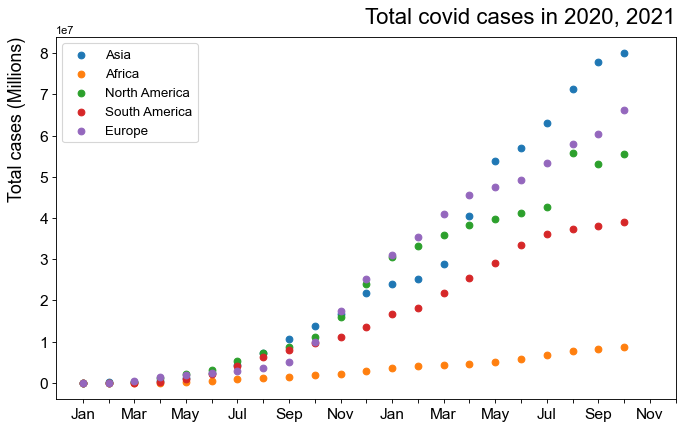

In [34]:
#TODO: Put this in a seperate plotter script.

# Figsize(x, y) in units of inches. dpi = 'dots per inch'
figure(figsize = (10, 6), dpi = 80)  # Initialize the figure

plt.tick_params(labelsize = 14)
plt.rcParams["font.family"] = "Arial"

# Axes and title label configurations
plt.xlabel('', fontsize = 16, loc = 'right', labelpad = 12)  
plt.ylabel('Total cases (Millions)', fontsize = 16, loc = 'top', labelpad = 12)   
plt.title(f'Total covid cases in 2020, 2021', fontsize = 20, loc = 'right', pad = 12)  

plt.scatter(months_list[ : 22], total_cases_Asia[ : 22],   label = 'Asia')
plt.scatter(months_list[ : 22], total_cases_Africa[ : 22], label = 'Africa')
plt.scatter(months_list[ : 22], total_cases_NA[ : 22],     label = 'North America')
plt.scatter(months_list[ : 22], total_cases_SA[ : 22],     label = 'South America')
plt.scatter(months_list[ : 22], total_cases_Europe[ : 22], label = 'Europe')

plt.xticks(months_list, months_labels)  # Manually set the date labels
plt.legend(loc = 2, prop = {'size': 12})

plt.show()